In [1]:
import numpy as np
import matplotlib.pylab as pl
%matplotlib inline
import cPickle as pickle
from scipy.stats import norm as gaussian

network structure: 3072-1024-1024-1024-1024-10
Activation values are computed on test data (10K samples).

In [2]:
activations = ('Tanh', 'ReLU')
data = {activation : {} for activation in activations}
for activation in activations:
    for ini_mode in ('default', 'layer-by-layer'):
        data[activation][ini_mode] = \
            pickle.load(open('pre-activation-value-%s-%s' % (activation, ini_mode), 'rb'))

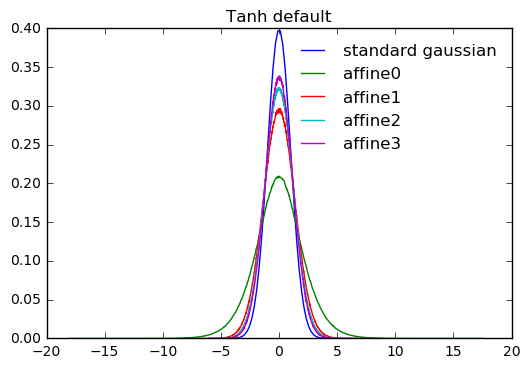

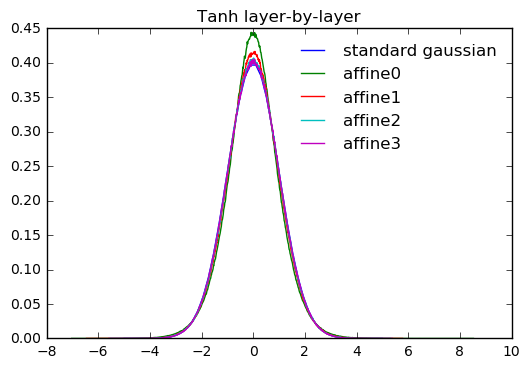

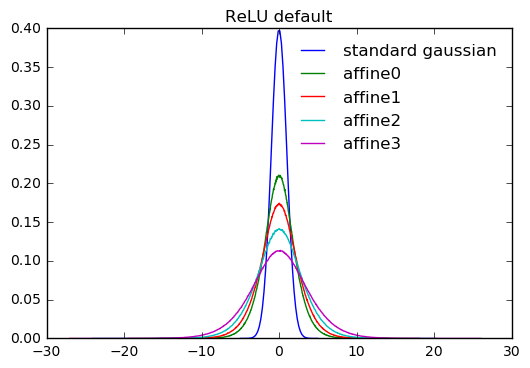

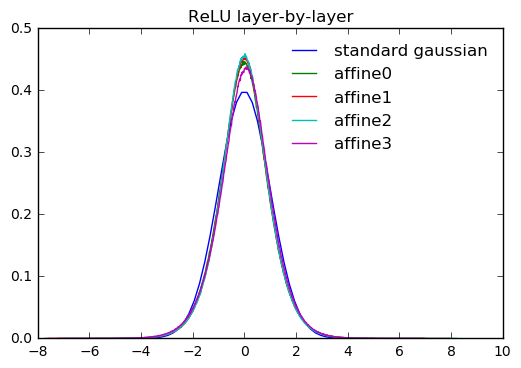

In [3]:
limit = 5
linespace = np.linspace(-limit, limit)
for activation in ('Tanh', 'ReLU'):
    for ini_mode in ('default', 'layer-by-layer'):
        storage = data[activation][ini_mode]
        pl.figure()
        pl.plot(linespace, gaussian.pdf(linespace), label='standard gaussian')
        for key, value in storage.items():
            densities, edges = np.histogram(value.flatten(), bins=1024, normed=True)
            centers = 0.5 * (edges[:-1] + edges[1:])
            pl.plot(centers, densities, label=key)
        pl.legend(framealpha=0, loc='upper right')
        pl.title('%s %s' % (activation, ini_mode))